In [1]:
import pandas as pd
pd.options.display.max_rows = 1000

import pickle

import numpy as np

import re
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

In [2]:
with open('../data/interim/02_cleaned.pkl', 'rb') as picklefile:
    df_listings = pickle.load(picklefile)

In [3]:
df_listings['neighborhood'].head()

0    OUTSIDE ZILLOW
1    OUTSIDE ZILLOW
2    OUTSIDE ZILLOW
3    OUTSIDE ZILLOW
4    OUTSIDE ZILLOW
Name: neighborhood, dtype: object

In [4]:
df_listings = df_listings[df_listings['neighborhood'] != 'OUTSIDE ZILLOW']

In [5]:
len(df_listings)

85033

In [11]:
df_listings[df_listings['neighborhood'].str.contains('Pilsen')][['neighborhood', 'price']]

,neighborhood,price
10269,East Pilsen,340.0
10271,Pilsen,90.0
10273,Pilsen,90.0
10274,East Pilsen,52.0
10276,East Pilsen,168.0
10277,East Pilsen,75.0
10279,East Pilsen,170.0
10280,Pilsen,79.0
10284,Pilsen,75.0
10285,East Pilsen,150.0


In [28]:
df_listings['neighborhood_overview'][10270]

'The Colorwheel is located in the Pilsen Neighborhood of Chicago.   What Pilsen is: Pilsen is the main artistic district of Chicago and is home to some of the most creative artistic endeavors in the city.   Where Pilsen is: Pilsen is located roughly 1 mile from downtown Chicago.  Anyone staying in Pilsen can easily travel to most of the main attractions, business centers, and conference venues of the city.  '

In [6]:
i = np.random.randint(low=42, high=80000)
print i
df_listings['neighborhood_overview'][i]

15409


"Having lived in the neighborhood for quite some time, it's always felt like home to me. It's a short stay away from the hustle and bustle of Hollywood so you get the peace and quiet when you want it. It's so close to so many places and attractions like Universal Studios as well as the trendy bars and restaurants of the NoHo arts district."

#### Preprocess neighborhood overviews for topic modeling

In [29]:
num_punct = string.punctuation
num_punct.replace("'", "")
num_punct += '0123456789'

In [30]:
df_listings.loc[:,'lower'] = df_listings['neighborhood_overview'].map(lambda s: s.lower().translate(None, num_punct).decode('utf-8').split())

In [31]:
df_listings['lower'][10270]

[u'the',
 u'colorwheel',
 u'is',
 u'located',
 u'in',
 u'the',
 u'pilsen',
 u'neighborhood',
 u'of',
 u'chicago',
 u'what',
 u'pilsen',
 u'is',
 u'pilsen',
 u'is',
 u'the',
 u'main',
 u'artistic',
 u'district',
 u'of',
 u'chicago',
 u'and',
 u'is',
 u'home',
 u'to',
 u'some',
 u'of',
 u'the',
 u'most',
 u'creative',
 u'artistic',
 u'endeavors',
 u'in',
 u'the',
 u'city',
 u'where',
 u'pilsen',
 u'is',
 u'pilsen',
 u'is',
 u'located',
 u'roughly',
 u'mile',
 u'from',
 u'downtown',
 u'chicago',
 u'anyone',
 u'staying',
 u'in',
 u'pilsen',
 u'can',
 u'easily',
 u'travel',
 u'to',
 u'most',
 u'of',
 u'the',
 u'main',
 u'attractions',
 u'business',
 u'centers',
 u'and',
 u'conference',
 u'venues',
 u'of',
 u'the',
 u'city']

In [32]:
test = df_listings['lower'][10270]
test.append('tulane'.decode('utf-8'))
test.append('smithsonian'.decode('utf-8'))
test.append('walgreens'.decode('utf-8'))
test

[u'the',
 u'colorwheel',
 u'is',
 u'located',
 u'in',
 u'the',
 u'pilsen',
 u'neighborhood',
 u'of',
 u'chicago',
 u'what',
 u'pilsen',
 u'is',
 u'pilsen',
 u'is',
 u'the',
 u'main',
 u'artistic',
 u'district',
 u'of',
 u'chicago',
 u'and',
 u'is',
 u'home',
 u'to',
 u'some',
 u'of',
 u'the',
 u'most',
 u'creative',
 u'artistic',
 u'endeavors',
 u'in',
 u'the',
 u'city',
 u'where',
 u'pilsen',
 u'is',
 u'pilsen',
 u'is',
 u'located',
 u'roughly',
 u'mile',
 u'from',
 u'downtown',
 u'chicago',
 u'anyone',
 u'staying',
 u'in',
 u'pilsen',
 u'can',
 u'easily',
 u'travel',
 u'to',
 u'most',
 u'of',
 u'the',
 u'main',
 u'attractions',
 u'business',
 u'centers',
 u'and',
 u'conference',
 u'venues',
 u'of',
 u'the',
 u'city',
 u'tulane',
 u'smithsonian',
 u'walgreens']

In [33]:
neighborhood_stopwords = []
for neighborhood in df_listings['neighborhood'].drop_duplicates().tolist()[1:]:
    neighborhood_stopwords.extend(neighborhood.encode('utf-8').lower().translate(None, num_punct).split())

In [34]:
location_stopwords = neighborhood_stopwords + \
                    [#cities
                    'san', 'francisco', 'sf', 'diego', 'sd', 'los', 'angeles', 'la', 'santa', 'monica', \
                    'new', 'york', 'city', 'nyc', 'orleans', 'nola', 'chicago', 'chi', 'boston', 'bos', \
                    'nashville', 'washington', 'dc', 'denver', 'portland', 'oakland', 'austin', 'seattle', \
                    'brooklyn', 'boulder', \
        
                    #cities possessive
                    'franciscos', 'sfs', 'diegos', 'sds', 'las', 'monicas', 'citys', 'nycs', 'nolas', \
                    'chicagos', 'chis', 'bostons', 'nashvilles', 'dcs', 'denvers', 'portlands', 'oaklands', \
                    'austins', 'seattles', 'brooklyns', \
        
                    #states
                    'california', 'washington', 'massachusetts', 'oregon', 'northwest', 'texas', 'colorado', \
                    'ca', 'ny', 'ma', 'co', 'wa', 'or', 'la', 'wa', 'tx', 'il', 'tn', 'mi', \
        
                    #regions
                    'pacific', 'northeast', 'nw', 'northwest', 'pacific', 'pnw', 'england', \
                    
                    #city specific stopwords
                    #san francisco
                    'bart', 'divisadero', 'haight', 'ucsf', 'fisherman', 'wharf', 'sausalito', 'nopa', \
                    'soma', 'muni', 'paint', ''\
        
                    #san diego
                    'sdsu', 'petco', 'seaworld', 'world', \
                    
                    #los angeles
                    'pasadena', 'universal', 'lax', 'hollywood', 'griffith', 'silverlake', 'ucla', 'ventura', \
                    'theater', 'dodgers', 'disney', 'runyon', 'lacma', 'staple', 'rise', 'bowl', 'jpl', 'norton', \
                    'simon', 'kinney', \
                    
                    #new york city
                    'bed', 'stuy', 'bedstuy', 'barclays', 'hell', 'kitchen', 'hudson', 'empire', 'broadway', 'statue', 'liberty', \
        
                    #new orleans
                    'tulane', 'loyola', 'bourbon', 'katrina', 'mississippi', 'superdome', 'magazine', 'mardi', 'gras', \
        
                    #chicago
                    'cta', 'metra', 'boystown', 'clark', 'cub', 'divvy', 'halsted', 'lakefront', \
        
                    #boston
                    'charles', 'copley', 'seaport', 'newbury', 'prudential', \
        
                    #nashville
                    'opry', \
                    
                    #washingtondc
                    'smithsonian', 'adam', 'mall', 'metro', 'national', \
        
                    #denver
                    'coors', 'bronco', 'breckinridge', 'lodo', 'pepsi', 'rino', 'convention', \
                    
                    #portland
                    'powell', 'willamette', 'alberta', 'division', 'ne', 'se', \
        
                    
                    #oakland
                    
        
                    #austin
                    'sxsw', 'acl', 'ut', 'soco', 'rainey', 'greenbelt', 'mueller', \
        
                    #seattle
                    'space', 'needle', 'pike', 'starbucks', 'puget', 'sound', \
        
                    #other/misc
                    'website', 'line', 'height', 'sensitive', 'content', 'distance', 'mile', \
                    'minute', 'min', 'away', 'lot', 'ton', 'direction', 'close', \
                    'many', 'also', 'enough', 'location', 'locate', 'reade', 'joes', 'ave', 'really', \
                    'everything', 'less']

In [35]:
location_stopwords.pop(location_stopwords.index('market'))

'market'

In [36]:
location_stopwords.pop(location_stopwords.index('university'))

'university'

In [37]:
'university' in location_stopwords

True

In [38]:
replace_words = {'subway': ['cta', 'metra', 'bart', 'muni', 'metro'],
                 'museum': ['smithsonian'],
                 'sports': ['bronco', 'sox', 'cub', 'superdome', 'petco', 'dodgers', 'staple'],
                 'pharmacy': ['duane', 'walgreens'],
                 'grocery': ['whole', 'trader', 'ralphs', 'safeway'], 
                 'campus': ['ut', 'tulane', 'loyola', 'ucla', 'ucsf', 'uw']}

In [39]:
replace_words_decoded = {}
for key, lst in replace_words.items():
    replace_words_decoded[key.decode('utf-8')] = [s.decode('utf-8') for s in lst]

In [40]:
stopwords = nltk.corpus.stopwords.words('english')
decoded_stopwords = [s.decode('utf-8') for s in location_stopwords]
stopwords.extend(decoded_stopwords)

In [41]:
lemmatizer = WordNetLemmatizer()
lemma_pos = {'JJ': 'a',
             'NN': 'n',
             'RB': 'r', 
             'VB': 'v'}

def lemmatize(word_list):
    lemmas = []
    pos_tags = pos_tag(word_list)
    #print pos_tags
    for word, pos in pos_tags:
        #print word, pos
        #remove proper nouns
        if pos != 'NNP' and pos != 'NNPS':
            try:
                p = lemma_pos[pos[:2]]
                lemma = lemmatizer.lemmatize(word, pos=p)
                #replace specific words with generic words
                for key, lst in replace_words_decoded.items():
                    for word in lst:
                        if lemma == word:
                            lemma = key
                #remove stopwords
                if lemma not in stopwords:
                    lemmas.append(lemma)
            except:
                continue
    return lemmas

In [42]:
test

[u'the',
 u'colorwheel',
 u'is',
 u'located',
 u'in',
 u'the',
 u'pilsen',
 u'neighborhood',
 u'of',
 u'chicago',
 u'what',
 u'pilsen',
 u'is',
 u'pilsen',
 u'is',
 u'the',
 u'main',
 u'artistic',
 u'district',
 u'of',
 u'chicago',
 u'and',
 u'is',
 u'home',
 u'to',
 u'some',
 u'of',
 u'the',
 u'most',
 u'creative',
 u'artistic',
 u'endeavors',
 u'in',
 u'the',
 u'city',
 u'where',
 u'pilsen',
 u'is',
 u'pilsen',
 u'is',
 u'located',
 u'roughly',
 u'mile',
 u'from',
 u'downtown',
 u'chicago',
 u'anyone',
 u'staying',
 u'in',
 u'pilsen',
 u'can',
 u'easily',
 u'travel',
 u'to',
 u'most',
 u'of',
 u'the',
 u'main',
 u'attractions',
 u'business',
 u'centers',
 u'and',
 u'conference',
 u'venues',
 u'of',
 u'the',
 u'city',
 u'tulane',
 u'smithsonian',
 u'walgreens']

In [43]:
%timeit lemmatize(test)
lemmatize(test)

The slowest run took 500.04 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 9.45 ms per loop


[u'colorwheel',
 u'main',
 u'artistic',
 u'home',
 u'creative',
 u'artistic',
 u'endeavor',
 u'roughly',
 u'anyone',
 u'stay',
 u'easily',
 u'travel',
 u'main',
 u'attraction',
 u'conference',
 u'venue',
 u'campus',
 u'museum',
 u'pharmacy']

In [43]:
%%time
df_listings.loc[:,'lemmas'] = df_listings['lower'].map(lambda lst: lemmatize(lst))

CPU times: user 11min 38s, sys: 5.67 s, total: 11min 43s
Wall time: 11min 43s


In [44]:
with open('../data/interim/04_lemmas.pkl', 'wb') as picklefile:
    pickle.dump(df_listings, picklefile)

#### Create dataframes for clustering on neighborhoods

In [44]:
with open('../data/interim/04_lemmas.pkl', 'rb') as picklefile:
    df_listings = pickle.load(picklefile)

In [45]:
df_descriptions = df_listings.groupby(['neighborhood', 'city', 'state'])['lemmas'].apply(lambda lst: [' '.join(x) for x in lst]).reset_index()
df_descriptions['lemmas'] = df_descriptions['lemmas'].apply(lambda x: ' '.join(x))

In [46]:
i = np.random.randint(low=0, high=895)
print i, df_descriptions['neighborhood'][i], df_descriptions['city'][i]
df_descriptions['lemmas'][i]

212 Castleton Corners newyorkcity


u'clean friendly bus foot'

In [47]:
df_listings['neighborhood_overview'][86943]

"We are located in a quiet and safe residential neighborhood with easy street parking 4 blocks from Children's Hospital and less than 10 minutes drive to University Village Mall and UW."

In [48]:
df_listings[df_listings['neighborhood']=='Laurelhurst'][['city', 'neighborhood_overview']]

,city,neighborhood_overview
71912,portland,Laurelhurst is one of Portland's first neighbo...
71913,portland,Historic Laurelhurst is one of Portland's most...
71914,portland,Laurelhurst is a neighborhood of vintage homes...
71915,portland,"""Keep Portland Weird"" is the next door neighbo..."
71916,portland,Laurelhurst is the oldest neighbor in Portland...
71917,portland,This is a great neighborhood right around the ...
71918,portland,"Laurelhurst Park, Hollywood Theatre, restauran..."
71919,portland,The home is located in the Hollywood/Broadway ...
71920,portland,Laurelhurst is a neighborhood of vintage homes...
71921,portland,Such a great location! Half block from Laurel...


In [49]:
df_descriptions[df_descriptions['neighborhood']=='Pilsen']

,neighborhood,city,state,lemmas
1187,Pilsen,chicago,IL,restaurant bar art coffee shop mccormick mus...


In [57]:
df_descriptions['lemmas'][804]

u' feel yet coffee shop public transportation   beautiful able take beautiful large short childrens hospital pound dog go use front dog go backyard use larureulhurst soughtafter residential wellknown people live bill banderas detail url home safe childrens hospital husky coffee restaurant campus car   safe residential easy childrens hospital campus campus museum pharmacy'

In [51]:
df_counts = df_listings.groupby(['neighborhood', 'city', 'state']).count()['id'].reset_index()
df_counts.rename(columns={'id': 'num_listings'}, inplace=True)
df_counts.head(10)

,neighborhood,city,state,num_listings
0,Abbington Park Condos,nashville,TN,2
1,Abbot Martin Estates,nashville,TN,1
2,Acklen Avenue Alliance,nashville,TN,5
3,Acorn,oakland,CA,1
4,Adams Hill,losangeles,CA,9
5,Adams Morgan,washingtondc,DC,185
6,Adams North,sandiego,CA,26
7,Adams Point,oakland,CA,33
8,Adams-Normandie,losangeles,CA,36
9,Admiral,seattle,WA,39


In [52]:
df_neighborhoods = df_descriptions.merge(df_counts)

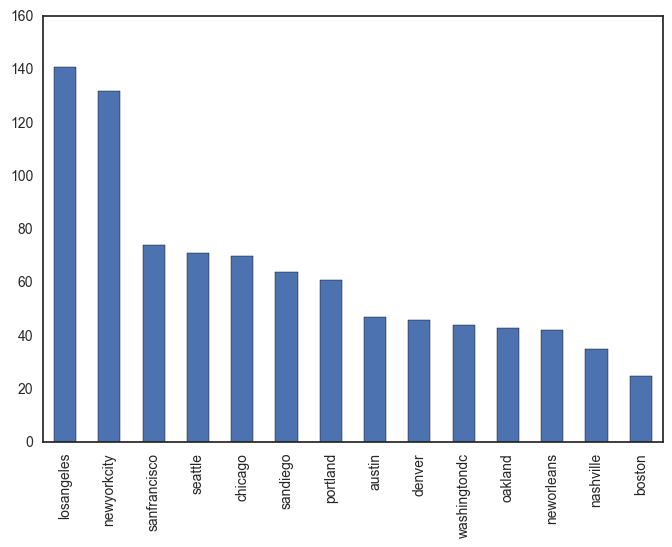

In [53]:
df_neighborhoods[df_neighborhoods['num_listings'] >= 10]['city'].value_counts().plot(kind='bar');

In [54]:
df_neighborhoods = df_neighborhoods[df_neighborhoods['num_listings'] >= 10]

In [55]:
with open('../data/interim/04_neighborhoods_lemmas.pkl', 'wb') as picklefile:
    pickle.dump(df_neighborhoods, picklefile)